Primero, tenemos las variables:
$$\rho_a: \text{Densidad del aire}$$
$$\rho_d: \text{Densidad de la gota}$$
$$F_d: \text{Friccion con el aire}$$
$$E: \text{Empuje} $$
$$\eta: \text{Viscosidad dinamica del aire}$$
Luego, la ecuacion de movimiento sera

$$m\frac{dv}{dt}= E + F_d - mg = \frac{4\pi}{3} r_d^3 \rho_a g - 6\pi \eta r_d v - \frac{4\pi}{3} r_d^3 \rho_d g $$

Podemos colocar la ecuacion para usar odeint:

$$ \frac{dv}{dt}= \frac{\rho_a}{\rho_d} g - \frac{9 \eta}{2  r_d^2 \rho_d}  v - g $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

pi=np.pi

ro_a= 1.225 # kg/m3
ro_d= 1000 # kg/m3
eta= 1.849E-5 # kg/m.s 
r_d= 5E-6 # m
g= 9.81 # m/s2

alpha= 10

In [2]:
def F(y,t):
    
    dy=[0,0]
    dy[0]= y[1] 
    dy[1]= (((ro_a /ro_d) - 1) * g) - ((9 *eta / (2 * (r_d**2) * ro_d)) * y[1])
    return dy

In [3]:
t_inicial= 0
t_max= 0.005
#t_max= 0.2
dt= 0.000001
t= np.arange(t_inicial, t_max+dt, dt)

In [4]:
y0=[0.0, 0.0]

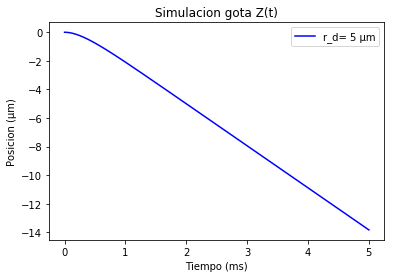

In [5]:
plt.figure()
y= odeint(F, y0, t)
plt.plot(t*1E3,y[:,0]*1E6,'b', label='r_d= 5 \N{greek small letter mu}m')
ax=plt.gca()
ax.set_title('Simulacion gota Z(t)')
ax.set_xlabel('Tiempo (ms)')
ax.set_ylabel('Posicion (\N{greek small letter mu}m)')
plt.axis()
ax.legend()
plt.show()

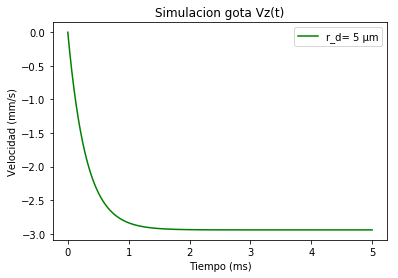

In [6]:
plt.plot(t*1E3,y[:,1]*1E3,'g', label='r_d= 5 \N{greek small letter mu}m')
ax=plt.gca()
ax.set_title('Simulacion gota Vz(t)')
ax.set_xlabel('Tiempo (ms)')
ax.set_ylabel('Velocidad (mm/s)')
ax.legend()
plt.axis()
plt.show()

In [7]:
vel_max= (2*g*(r_d**2)*(ro_d-ro_a))/(9*eta);
print('La velocidad limite teorica, cuando dv/dt -> 0 sera:\n {:.8f} m/s'.format(vel_max))

La velocidad limite teorica, cuando dv/dt -> 0 sera:
 0.00294393 m/s


In [8]:
#print(len(y))
n= len(y)
for i in range(len(y)):
    if abs(y[i,1] + vel_max) < 0.00000001:
        print('{}\t\tmaxvel = {:.8f} m/s en posicion {:.3f} \N{greek small letter mu}m en t= {:.7f} ms'.format(i, y[i,1], y[i,0]*1e6, t[i]*1e3))
        break
print('{}\t\tmaxvel = {:.8f} m/s en posicion {:.3f} \N{greek small letter mu}m en t= {:.7f} ms'.format(n-1, y[n-1,1], y[n-1,0]*1e6, t[n-1]*1e3))        

3779		maxvel = -0.00294392 m/s en posicion -10.241 μm en t= 3.7790000 ms
5001		maxvel = -0.00294393 m/s en posicion -13.838 μm en t= 5.0010000 ms



Observamos que la velocidad limite obtenida numericamente es la misma a la teorica con una precision de 7 decimales. 
Ademas esta velocidad se obtiene luego de 0.003832 segundos de iniciarse el movimiento y esta haya caido $10.397 \mu m$


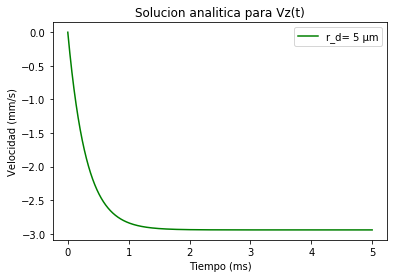

In [9]:
k= ((ro_a/ro_d)-1)
k1= 9 *eta / (2 * (r_d**2) * ro_d)
y_exac= (k*g/k1) * ( 1 - np.exp(-k1*t)) 

plt.plot(t*1e3,y_exac*1e3,'g', label='r_d= 5 \N{greek small letter mu}m')
ax=plt.gca()
ax.set_title('Solucion analitica para Vz(t)')
ax.set_xlabel('Tiempo (ms)')
ax.set_ylabel('Velocidad (mm/s)')
ax.legend()
plt.axis()
plt.show()
plt.show()

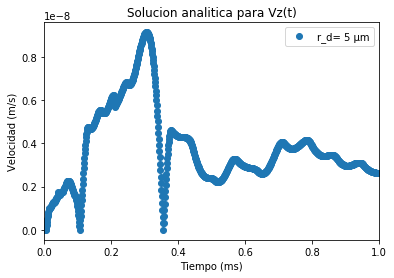

In [10]:
plt.plot(t*1e3,abs(y[:,1]-y_exac),'o', label='r_d= 5 \N{greek small letter mu}m')
ax=plt.gca()
ax.set_title('Error entre analitico y numerico pra Vz')
plt.xlim(0, 1.0)
ax=plt.gca()
ax.set_title('Solucion analitica para Vz(t)')
ax.set_xlabel('Tiempo (ms)')
ax.set_ylabel('Velocidad (m/s)')
ax.legend()
plt.axis()
plt.show()
plt.show()
plt.show()


Ahora resolveremos considerando parte de la gota se evapora, aca consideramos el termino $\dot{m} $:

$$m\frac{dv}{dt} + v\frac{dm}{dt}= E + F_d - mg = \frac{4\pi}{3} r_d^3 \rho_a g - 6\pi \eta r_d v - \frac{4\pi}{3} r_d^3 \rho_d g $$ 

luego

$$ \frac{dv}{dt}= \left( \frac{\rho_a}{\rho_d} - 1 \right) g - \frac{9 \eta}{2  r^2(t) \rho_d}  v  - \frac{v}{m}\frac{dm}{dt}  $$

$$ \frac{dv}{dt}= \left( \frac{\rho_a}{\rho_d} - 1 \right) g - \frac{9 \eta}{2  r_d^2 e^{-2 \alpha t} \rho_d}  v  - \frac{-3\alpha r_d^3 e^{-3\alpha t}}{ r_d^3 e^{-3\alpha t} } v $$

$$ \frac{dv}{dt}= \left( \frac{\rho_a}{\rho_d} - 1 \right) g - \frac{9 \eta}{2  r_d^2 e^{-2 \alpha t} \rho_d}  v  + 3\alpha v $$


con

$$r(t) = r_d e^{-\alpha t} $$

In [11]:
def G(y,t):
    
    dy=[0,0]
    dy[0]= y[1] 
    dy[1]= (((ro_a /ro_d) - 1) * g ) - (9 *eta / (2 * ( r_d**2 * np.exp(-2*t*alpha) * ro_d))) * y[1] + 3*alpha * y[1]
    return dy

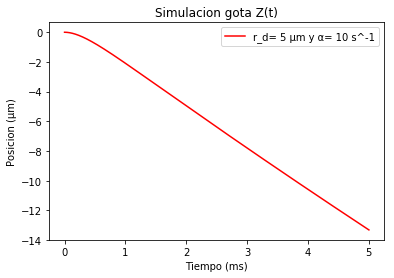

In [12]:
plt.figure()
y2= odeint(G, y0, t)
plt.plot(t*1E3,y2[:,0]*1E6,'r', label='r_d= 5 \N{greek small letter mu}m y \N{greek small letter alpha}= 10 s^-1' )
ax=plt.gca()
ax.set_title('Simulacion gota Z(t)')
ax.set_xlabel('Tiempo (ms)')
ax.set_ylabel('Posicion (\N{greek small letter mu}m)')
plt.axis()
ax.legend()
plt.show()

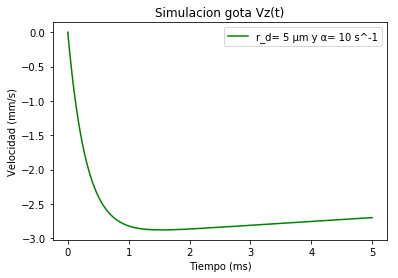

In [13]:
plt.plot(t*1E3,y2[:,1]*1E3,'g', label='r_d= 5 \N{greek small letter mu}m y \N{greek small letter alpha}= 10 s^-1' )
ax=plt.gca()
ax.set_title('Simulacion gota Vz(t)')
ax.set_xlabel('Tiempo (ms)')
ax.set_ylabel('Velocidad (mm/s)')
plt.axis()
ax.legend()
plt.show()

In [14]:
def gota_dinamica(y, t, r_0= 1E-6, alpha1= 10):
    
    dy=[0,0]
    dy[0]= y[1] 
    dy[1]= (((ro_a /ro_d) - 1) * g ) - (9 *eta / (2 * ( r_0**2 * np.exp(-2*t*alpha1) * ro_d))) * y[1] + 3*alpha1 * y[1]
    return dy

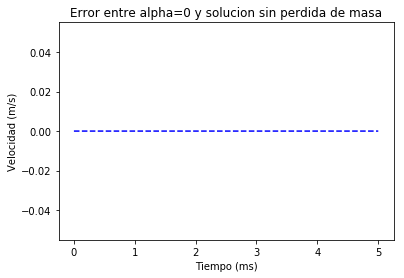

In [15]:
y_alpha0= odeint(gota_dinamica, y0, t, args=(5E-6,0))

plt.plot(t*1e3,abs(y_alpha0[:,1]-y[:,1]),'b--')
ax=plt.gca()
ax.set_title('Error entre alpha=0 y solucion sin perdida de masa')
ax.set_xlabel('Tiempo (ms)')
ax.set_ylabel('Velocidad (m/s)')
plt.show()

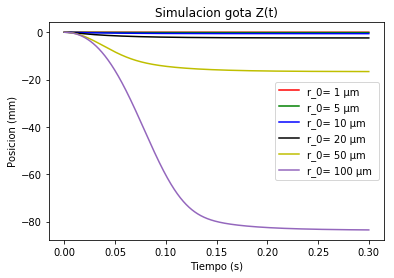

In [16]:
t_inicial= 0
t_max= 0.3
dt= 0.00001
t= np.arange(t_inicial, t_max+dt, dt)



plt.figure()
y_micro1= odeint(gota_dinamica, y0, t, args=(1E-6,))
y_micro2= odeint(gota_dinamica, y0, t, args=(5E-6,))
y_micro3= odeint(gota_dinamica, y0, t, args=(10E-6,))
y_micro4= odeint(gota_dinamica, y0, t, args=(50E-6,))
y_micro5= odeint(gota_dinamica, y0, t, args=(100E-6,))
y_micro6= odeint(gota_dinamica, y0, t, args=(20E-6,))

plt.plot(t,y_micro1[:,0]*1e3,'r', label='r_0= 1 \N{greek small letter mu}m ')
plt.plot(t,y_micro2[:,0]*1e3,'g', label='r_0= 5 \N{greek small letter mu}m ')
plt.plot(t,y_micro3[:,0]*1e3,'b', label='r_0= 10 \N{greek small letter mu}m ')
plt.plot(t,y_micro6[:,0]*1e3,'k', label='r_0= 20 \N{greek small letter mu}m ')
plt.plot(t,y_micro4[:,0]*1e3,'y', label='r_0= 50 \N{greek small letter mu}m ')
plt.plot(t,y_micro5[:,0]*1e3,'tab:purple', label='r_0= 100 \N{greek small letter mu}m ')


ax=plt.gca()
ax.set_title('Simulacion gota Z(t)')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Posicion (mm)')
ax.legend()
plt.axis()
plt.show()

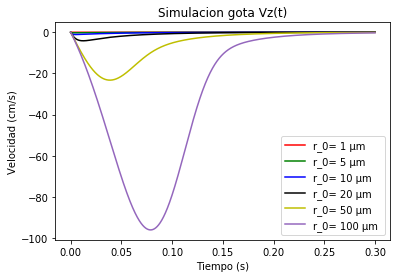

In [17]:


plt.plot(t,y_micro1[:,1]*1E2,'r', label='r_0= 1 \N{greek small letter mu}m ')
plt.plot(t,y_micro2[:,1]*1E2,'g', label='r_0= 5 \N{greek small letter mu}m ')
plt.plot(t,y_micro3[:,1]*1E2,'b', label='r_0= 10 \N{greek small letter mu}m ')
plt.plot(t,y_micro6[:,1]*1E2,'k', label='r_0= 20 \N{greek small letter mu}m ')
plt.plot(t,y_micro4[:,1]*1E2,'y', label='r_0= 50 \N{greek small letter mu}m ')
plt.plot(t,y_micro5[:,1]*1E2,'tab:purple', label='r_0= 100 \N{greek small letter mu}m ')

ax=plt.gca()
ax.set_title('Simulacion gota Vz(t)')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Velocidad (cm/s)')
ax.legend()

plt.axis()
plt.show()

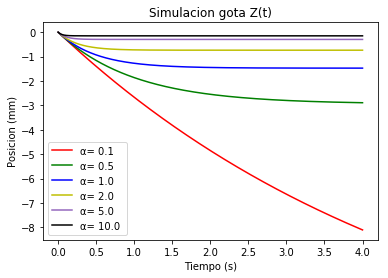

In [18]:
t_inicial= 0
t_max= 4.0
dt= 0.0001
t= np.arange(t_inicial, t_max+dt, dt)


plt.figure()
y_alfa1= odeint(gota_dinamica, y0, t, args=(r_d,0.1))
y_alfa2= odeint(gota_dinamica, y0, t, args=(r_d,0.5))
y_alfa3= odeint(gota_dinamica, y0, t, args=(r_d,1.0))
y_alfa4= odeint(gota_dinamica, y0, t, args=(r_d,2.0))
y_alfa5= odeint(gota_dinamica, y0, t, args=(r_d,5.0))
y_alfa6= odeint(gota_dinamica, y0, t, args=(r_d,10.0))

plt.plot(t,y_alfa1[:,0]*1e3,'r', label='\N{greek small letter alpha}= 0.1 ')
plt.plot(t,y_alfa2[:,0]*1e3,'g', label='\N{greek small letter alpha}= 0.5 ')
plt.plot(t,y_alfa3[:,0]*1e3,'b', label='\N{greek small letter alpha}= 1.0  ')
plt.plot(t,y_alfa4[:,0]*1e3,'y', label='\N{greek small letter alpha}= 2.0  ')
plt.plot(t,y_alfa5[:,0]*1e3,'tab:purple', label='\N{greek small letter alpha}= 5.0  ')
plt.plot(t,y_alfa6[:,0]*1e3,'k', label='\N{greek small letter alpha}= 10.0 ')

ax=plt.gca()
ax.set_title('Simulacion gota Z(t)')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Posicion (mm)')
ax.legend()
plt.axis()
plt.show()

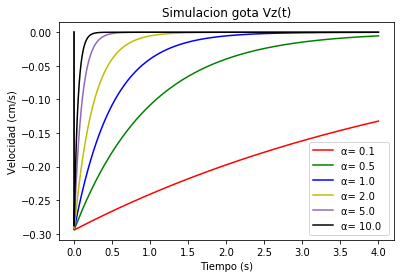

In [19]:
plt.plot(t,y_alfa1[:,1]*1e2,'r', label='\N{greek small letter alpha}= 0.1 ')
plt.plot(t,y_alfa2[:,1]*1e2,'g', label='\N{greek small letter alpha}= 0.5 ')
plt.plot(t,y_alfa3[:,1]*1e2,'b', label='\N{greek small letter alpha}= 1.0  ')
plt.plot(t,y_alfa4[:,1]*1e2,'y', label='\N{greek small letter alpha}= 2.0  ')
plt.plot(t,y_alfa5[:,1]*1e2,'tab:purple', label='\N{greek small letter alpha}= 5.0  ')
plt.plot(t,y_alfa6[:,1]*1e2,'k', label='\N{greek small letter alpha}= 10.0 ')

ax=plt.gca()
ax.set_title('Simulacion gota Vz(t)')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Velocidad (cm/s)')
ax.legend()
plt.axis()
plt.show()

In [20]:
def gota_con_arrastre(y, t, r_0= 5e-6, alpha1= 10, velocidad_flujo= 0.15):
    
    dy=[0,0]
    dy[0]= y[1] 
    dy[1]= (((ro_a /ro_d) - 1) * g ) - (9 *eta / (2 * ( r_0**2 * np.exp(-2*t*alpha1) * ro_d))) * (y[1] - velocidad_flujo) + 3*alpha1 * y[1]
    return dy

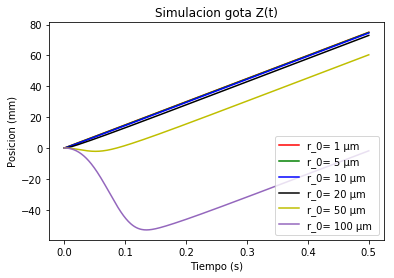

In [21]:
t_0= 0
t_max= 0.5
dt= 0.001
t= np.arange(t_inicial, t_max+dt, dt)

plt.figure()
drag1= odeint(gota_con_arrastre, y0, t, args=(1E-6,))
drag2= odeint(gota_con_arrastre, y0, t, args=(5E-6,))
drag3= odeint(gota_con_arrastre, y0, t, args=(10E-6,))
drag4= odeint(gota_con_arrastre, y0, t, args=(20E-6,))
drag5= odeint(gota_con_arrastre, y0, t, args=(50E-6,))
drag6= odeint(gota_con_arrastre, y0, t, args=(100E-6,))


plt.plot(t,drag1[:,0]*1e3,'r', label='r_0= 1 \N{greek small letter mu}m ')
plt.plot(t,drag2[:,0]*1e3,'g', label='r_0= 5 \N{greek small letter mu}m ')
plt.plot(t,drag3[:,0]*1e3,'b', label='r_0= 10 \N{greek small letter mu}m ')
plt.plot(t,drag4[:,0]*1e3,'k', label='r_0= 20 \N{greek small letter mu}m ')
plt.plot(t,drag5[:,0]*1e3,'y', label='r_0= 50 \N{greek small letter mu}m ')
plt.plot(t,drag6[:,0]*1e3,'tab:purple', label='r_0= 100 \N{greek small letter mu}m ')


ax=plt.gca()
ax.set_title('Simulacion gota Z(t)')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Posicion (mm)')
ax.legend()
plt.axis()
plt.show()

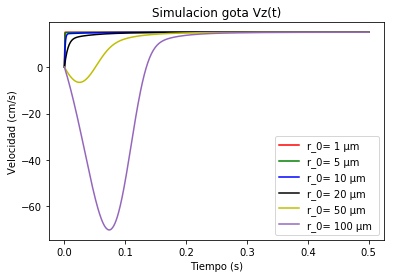

In [22]:
plt.plot(t,drag1[:,1]*1E2,'r', label='r_0= 1 \N{greek small letter mu}m ')
plt.plot(t,drag2[:,1]*1E2,'g', label='r_0= 5 \N{greek small letter mu}m ')
plt.plot(t,drag3[:,1]*1E2,'b', label='r_0= 10 \N{greek small letter mu}m ')
plt.plot(t,drag4[:,1]*1E2,'k', label='r_0= 20 \N{greek small letter mu}m ')
plt.plot(t,drag5[:,1]*1E2,'y', label='r_0= 50 \N{greek small letter mu}m ')
plt.plot(t,drag6[:,1]*1E2,'tab:purple', label='r_0= 100 \N{greek small letter mu}m ')

ax=plt.gca()
ax.set_title('Simulacion gota Vz(t)')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Velocidad (cm/s)')
ax.legend()

plt.axis()
plt.show()

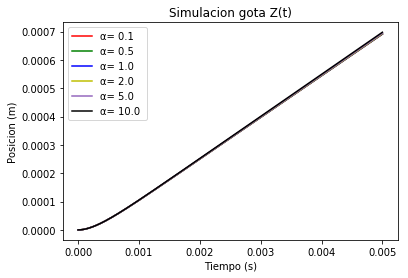

In [23]:
t_0= 0
t_max= 0.005
dt= 0.00001
t= np.arange(t_0, t_max+dt, dt)


plt.figure()
sol1= odeint(gota_con_arrastre, y0, t, args=(r_d,0.1))
sol2= odeint(gota_con_arrastre, y0, t, args=(r_d,0.5))
sol3= odeint(gota_con_arrastre, y0, t, args=(r_d,1.0))
sol4= odeint(gota_con_arrastre, y0, t, args=(r_d,2.0))
sol5= odeint(gota_con_arrastre, y0, t, args=(r_d,5.0))
sol6= odeint(gota_con_arrastre, y0, t, args=(r_d,10.0))

plt.plot(t,sol1[:,0],'r', label='\N{greek small letter alpha}= 0.1 ')
plt.plot(t,sol2[:,0],'g', label='\N{greek small letter alpha}= 0.5 ')
plt.plot(t,sol3[:,0],'b', label='\N{greek small letter alpha}= 1.0  ')
plt.plot(t,sol4[:,0],'y', label='\N{greek small letter alpha}= 2.0  ')
plt.plot(t,sol5[:,0],'tab:purple', label='\N{greek small letter alpha}= 5.0  ')
plt.plot(t,sol6[:,0],'k', label='\N{greek small letter alpha}= 10.0 ')

ax=plt.gca()
ax.set_title('Simulacion gota Z(t)')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Posicion (m)')
ax.legend()
plt.axis()
plt.show()

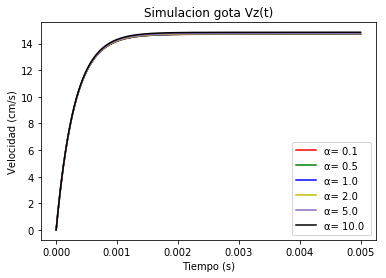

In [24]:
plt.plot(t,sol1[:,1]*1e2,'r', label='\N{greek small letter alpha}= 0.1 ')
plt.plot(t,sol2[:,1]*1e2,'g', label='\N{greek small letter alpha}= 0.5 ')
plt.plot(t,sol3[:,1]*1e2,'b', label='\N{greek small letter alpha}= 1.0  ')
plt.plot(t,sol4[:,1]*1e2,'y', label='\N{greek small letter alpha}= 2.0  ')
plt.plot(t,sol5[:,1]*1e2,'tab:purple', label='\N{greek small letter alpha}= 5.0  ')
plt.plot(t,sol6[:,1]*1e2,'k', label='\N{greek small letter alpha}= 10.0 ')

ax=plt.gca()
ax.set_title('Simulacion gota Vz(t)')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Velocidad (cm/s)')
ax.legend()
plt.axis()
plt.show()

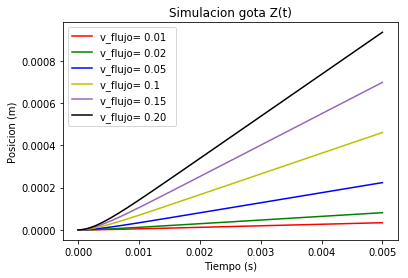

In [25]:
t_0= 0
t_max= 0.005
dt= 0.00001
t= np.arange(t_0, t_max+dt, dt)


plt.figure()
vel1= odeint(gota_con_arrastre, y0, t, args=(r_d,alpha,0.01))
vel2= odeint(gota_con_arrastre, y0, t, args=(r_d,alpha,0.02))
vel3= odeint(gota_con_arrastre, y0, t, args=(r_d,alpha,0.05))
vel4= odeint(gota_con_arrastre, y0, t, args=(r_d,alpha,0.1))
vel5= odeint(gota_con_arrastre, y0, t, args=(r_d,alpha,0.15))
vel6= odeint(gota_con_arrastre, y0, t, args=(r_d,alpha,0.20))

plt.plot(t,vel1[:,0],'r', label='v_flujo= 0.01 ')
plt.plot(t,vel2[:,0],'g', label='v_flujo= 0.02 ')
plt.plot(t,vel3[:,0],'b', label='v_flujo= 0.05 ')
plt.plot(t,vel4[:,0],'y', label='v_flujo= 0.1  ')
plt.plot(t,vel5[:,0],'tab:purple', label='v_flujo= 0.15  ')
plt.plot(t,vel6[:,0],'k', label='v_flujo= 0.20')

ax=plt.gca()
ax.set_title('Simulacion gota Z(t)')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Posicion (m)')
ax.legend()
plt.axis()
plt.show()

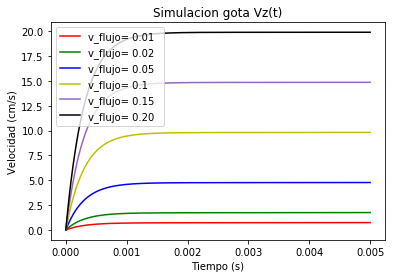

In [26]:
plt.plot(t,vel1[:,1]*1e2,'r', label='v_flujo= 0.01 ')
plt.plot(t,vel2[:,1]*1e2,'g', label='v_flujo= 0.02 ')
plt.plot(t,vel3[:,1]*1e2,'b', label='v_flujo= 0.05 ')
plt.plot(t,vel4[:,1]*1e2,'y', label='v_flujo= 0.1  ')
plt.plot(t,vel5[:,1]*1e2,'tab:purple', label='v_flujo= 0.15  ')
plt.plot(t,vel6[:,1]*1e2,'k', label='v_flujo= 0.20')

ax=plt.gca()
ax.set_title('Simulacion gota Vz(t)')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Velocidad (cm/s)')
ax.legend()
plt.axis()
plt.show()